# Otimização de Algoritmos
Ao otimizar um algoritmo, no final queremos otimizar uma função

## Extremos (Máximos e Mínimos) das funções
Os máximos e mínimos podem ser locais e globais. É sempre muito difícil garantir que você encontrará o global

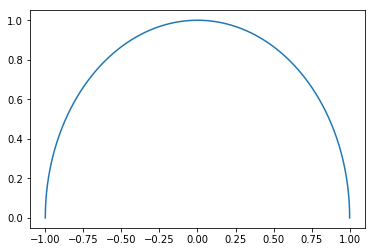

In [1]:
% matplotlib inline

import seaborn as sns
import numpy as np

x = np.linspace(-1,1,5000) # 5000 números consecutivos de -1 até 1
y = np.sqrt(1-x**2) # computa o valor da função

# plota resultado
sns.lineplot(x,y)

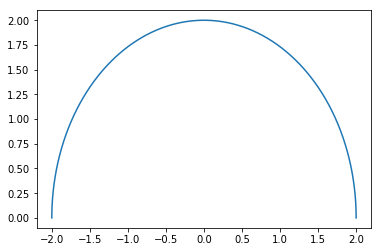

In [4]:
x = np.linspace(-2,2,5000) # 5000 números consecutivos de -1 até 1
y = np.sqrt(4-x**2) # computa o valor da função

# plota resultado
sns.lineplot(x,y)

## Então é fácil assim otimizar algoritmos de machine learning?
Infelizemnte não.. São funçoões complexas e mal comportadas 

### Otimização de funções e Features de machine learning
As Features são nossas dimensões se você for comparar seu modelo com uma função. Caso o seu modelo tenha 2 features então ele já vai ter 3 dimensões, sendo 2 features mais o label

### Selecionando as melhores Features
Existem algumas alternativas interessantes para se escolher features:
- Features com alta correlação em relação ao Label provavelmente são boas
- Features que tenham muita correlação entre si podem viciar o modelo
- Através da importância de features aplicando modelos simples como o de árvore de decisão

#### Vamos testar com o dataset do zoológico

In [10]:
import pandas as pd 
zoo_df = pd.read_csv('zoo.csv')
class_df = pd.read_csv('class.csv')

zoo_class_df = zoo_df.merge(class_df, how='left', 
                            left_on='class_type', right_on='Class_Number')

features_names = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']

X = zoo_class_df[features_names]
y = zoo_class_df['Class_Type']

#### Agora dividimos entre treino e teste

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5, p=2)
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

#### Score

In [17]:
neigh.score(X_test, y_test)

0.9032258064516129

### Features com maior correlação com o Label
Vamos encontrar as melhores features baseado na técnica de correlação. No pandas podemos usar corr() para ver a correlação dos dados.
<br>
<br>
Vamos analisar o conjunto inteiro:

In [25]:
correlation_total = zoo_class_df.corr()[['class_type']]
correlation_total

,class_type
hair,-0.562384
feathers,-0.197520
eggs,0.661825
milk,-0.723683
airborne,0.022677
aquatic,0.326639
predator,0.061179
toothed,-0.471527
backbone,-0.828845
breathes,-0.519308


### Podemos imprimir 

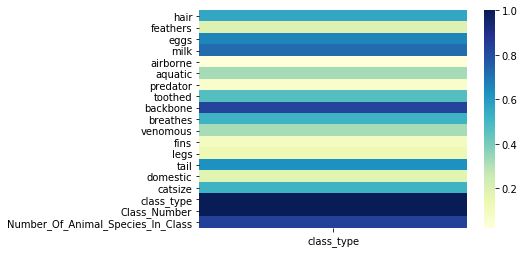

In [28]:
%matplotlib inline
import seaborn as sns
sns.heatmap(abs(correlation_total), cmap="YlGnBu")

In [35]:
filter_correlatade = (abs(correlation_total.class_type)>0.5)
correlation_total[filter_correlatade]

,class_type
hair,-0.562384
eggs,0.661825
milk,-0.723683
backbone,-0.828845
breathes,-0.519308
tail,-0.631830
catsize,-0.521030
class_type,1.000000
Class_Number,1.000000
Number_Of_Animal_Species_In_Class,-0.835864


In [38]:
features_names = ['hair', 'eggs', 'milk', 'backbone', 'breathes', 'tail', 'catsize']
X = zoo_class_df[features_names]
y = zoo_class_df['Class_Type']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5, p=2)
neigh.fit(X_train,y_train)

neigh.score(X_test, y_test)

0.8709677419354839

# One Hot Encoding

In [41]:
class_dummies = pd.get_dummies(zoo_class_df.Class_Type)

zoo_class_df_with_dummies = pd.concat([class_dummies, zoo_class_df], axis=1)

zoo_class_df_with_dummies.head()

,Amphibian,Bird,Bug,Fish,Invertebrate,Mammal,Reptile,animal_name,hair,feathers,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,0,0,0,0,0,1,0,aardvark,1,0,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,0,0,0,0,0,1,0,antelope,1,0,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,0,0,0,1,0,0,0,bass,0,0,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,0,0,0,0,0,1,0,bear,1,0,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,0,0,0,0,0,1,0,boar,1,0,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


#### Vamos fazer a correlação para cada classe separadamente

In [42]:
correlation_class = (zoo_class_df_with_dummies.corr()[class_dummies.columns])
correlation_class

,Amphibian,Bird,Bug,Fish,Invertebrate,Mammal,Reptile
Amphibian,1.000000,-0.100906,-0.059559,-0.078050,-0.067317,-0.167865,-0.046344
Bird,-0.100906,1.000000,-0.145739,-0.190987,-0.164722,-0.410761,-0.113402
Bug,-0.059559,-0.145739,1.000000,-0.112729,-0.097226,-0.242449,-0.066935
Fish,-0.078050,-0.190987,-0.112729,1.000000,-0.127412,-0.317722,-0.087716
Invertebrate,-0.067317,-0.164722,-0.097226,-0.127412,1.000000,-0.274028,-0.075653
Mammal,-0.167865,-0.410761,-0.242449,-0.317722,-0.274028,1.000000,-0.188654
Reptile,-0.046344,-0.113402,-0.066935,-0.087716,-0.075653,-0.188654,1.000000
hair,-0.174849,-0.427851,0.044047,-0.330941,-0.285430,0.878503,-0.196503
feathers,-0.100906,1.000000,-0.145739,-0.190987,-0.164722,-0.410761,-0.113402
eggs,0.171334,0.419248,0.247458,0.324287,0.212432,-0.938848,0.099944


In [43]:
filter_correlatade = (abs(correlation_class)>0.5)
correlation_class[filter_correlatade]

,Amphibian,Bird,Bug,Fish,Invertebrate,Mammal,Reptile
Amphibian,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Bird,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
Bug,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
Fish,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
Invertebrate,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
Mammal,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Reptile,NaN,NaN,NaN,NaN,NaN,NaN,1.0
hair,NaN,NaN,NaN,NaN,NaN,0.878503,NaN
feathers,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
eggs,NaN,NaN,NaN,NaN,NaN,-0.938848,NaN


In [45]:
correlation_class[filter_correlatade].stack()

Amphibian                          Amphibian       1.000000
Bird                               Bird            1.000000
Bug                                Bug             1.000000
Fish                               Fish            1.000000
Invertebrate                       Invertebrate    1.000000
Mammal                             Mammal          1.000000
Reptile                            Reptile         1.000000
hair                               Mammal          0.878503
feathers                           Bird            1.000000
eggs                               Mammal         -0.938848
milk                               Mammal          1.000000
airborne                           Bird            0.656553
aquatic                            Fish            0.516459
toothed                            Bird           -0.613631
                                   Mammal          0.628168
backbone                           Bug            -0.629805
                                   Inver

## Falando agora de método de seleção automática de features

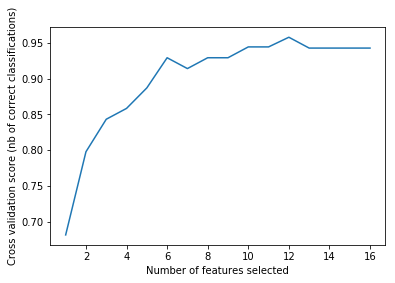

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

features_names = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']

X = zoo_class_df[features_names]
y = zoo_class_df['Class_Type']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators = 100, random_state=42)

rfecv = RFECV(estimator = rf, step = 1, cv = 2, scoring = 'accuracy')
rfecv.fit(X_train, y_train)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

In [47]:
rfecv.estimator_.feature_importances_

array([0.09862617, 0.14490939, 0.11826339, 0.12351468, 0.03315119,
       0.04860346, 0.08582568, 0.05145752, 0.09184516, 0.06572127,
       0.08449957, 0.05358252])

In [49]:
rfecv.score(X_test, y_test)

0.9354838709677419

### Mudando o Algoritmo e o método de seleção conseguimos resultados bem melhores! No caso, nosso algoritmo era o KNN, instance based e mudamos para o Random Forest que é model based

### Instance Based ou Memory Based
O algoritmo utiliza sempre o valor das outras instâncias para predizer uma nova instância. O treino é bem rápido mas a predição de novas instâncias costuma ser sempre mais custosa
### Model Based 


## Otimização de Hiperparâmetros do modelo
### Mas qual a diferença entre hiperparâmetros e pesos?

In [50]:
rf = rfecv.estimator
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Parâmetros do KNN que usamos anteriormente

In [51]:
neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## Grid Search
Lembram quando vocês fizeram teste para vários valores de K no KNN para descorbir o melhor?

In [52]:
from sklearn.model_selection import GridSearchCV

In [54]:
features_names = ['hair', 'feathers', 'eggs', 'milk',
       'aquatic', 'toothed', 'breathes', 
       'fins', 'tail']

X = zoo_class_df[features_names]
y = zoo_class_df['Class_Type']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=42)

In [55]:
neigh = KNeighborsClassifier()

parameters = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}

grid = GridSearchCV(neigh, parameters, cv=3)

In [56]:
grid_fitted = grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [61]:
grid_fitted.best_params_

{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}

In [62]:
neigh = KNeighborsClassifier(n_neighbors=2, p=1, weights='uniform')
neigh.fit(X_train,y_train)

neigh.score(X_test, y_test)

0.9354838709677419

## RF

In [ ]:
features_names = ['hair', 'feathers', 'eggs', 'milk',
       'aquatic', 'toothed', 'breathes', 
       'fins', 'tail']

X = zoo_class_df[features_names]
y = zoo_class_df['Class_Type']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=42)

In [75]:
rf = RandomForestClassifier()

parameters = {
    'criterion': ['entropy','gini'],
    'n_estimators': [10,50,100,200,500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'random_state': [10]
}

grid = GridSearchCV(rf, parameters, cv=3)

In [76]:
grid_fitted = grid.fit(X_train, y_train)
grid_fitted.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 10}

In [77]:
rf = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=10, n_estimators=50,
                           max_features='auto', min_samples_leaf=1, min_samples_split=2, random_state=10)
rf.fit(X_train,y_train)

rf.score(X_test, y_test)

0.9354838709677419

# AutoML
Como temos todos esse passos bem estruturados, já existem propostas para encontrar o melhor algoritmo, com melhores pesos, com os melhores hiperparâmetros e as melhores features para seus dados de forma simple

## Auto Sklearn
Utiliza Meta Learning e algoritmos bem legais para otimizar features. Ele também consegue construir Ensembles de modelos, mas ainda é muito recente e complicado de instalar

### Meta Learning
É a aprendizagem através de Meta Features para ter uma ideia de como funciona o seu dataset e qual pode ser o melhor algoritmo a ser usado.
<br>
<br>
Para conseguir essas Meta Features são utilizados:
- algoritmos rápidos
- dados exploratórios como: desvio padrão da amostra, número de features, quantidade de instâncias, etc

Essas Meta Features são salvas e classificadas com outras bases de um banco de dados para saber quais algoritmos podem performar melhor contra esse dataset

### Ensembles
São conjuntos de modelos que podem ser aplicados em um dataset e o resultado usado pode ser de qualquer um dos modelos ou de somente um deles.
<br>
<br>
Ex: Temos 3 modelos de classificação, 2 predizeram a classe A e 1 predizeu a classe B para uma instância